In [1]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

rytoev = np.float(13.605691930242388) #From QE

def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            if p[0] != "#" :
                x.append(float(p[0])*rytoev)
                y.append(float(p[1]))

    return x, y

def check_if_string_in_file(file_name, string_to_search):
    """ Check if any line in the file contains given string """
    # Open the file in read only mode
    with open(file_name, 'r') as read_obj:
        # Read all lines in the file one by one
        for line in read_obj:
            # For each line, check if line contains the string
            if string_to_search in line:
                return True
    return False

def Read_Four_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        w = []
        for line in data:
            p = line.split()
            if p[0] != "#" :
                x.append(float(p[0])*rytoev)
                y.append(float(p[1]))
                z.append(float(p[2]))
                w.append(float(p[3]))

    return x, y, z, w



<ipython-input-1-893203d59efc>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rytoev = np.float(13.605691930242388) #From QE


In [2]:
folder = './result/'

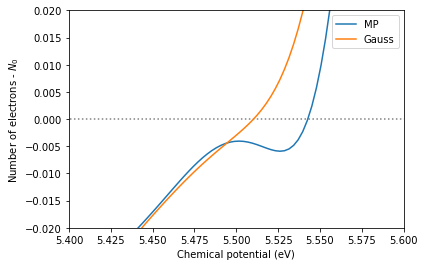

In [3]:
xs, ys = Read_Two_Column_File(folder+'num_electrons.dat')
plt.plot(xs, [0]*len(xs), ':', color='gray')

plt.plot(xs, ys, label='MP')

xs, ys = Read_Two_Column_File(folder+'num_electrons_gauss.dat')
plt.plot(xs, ys, label='Gauss')

plt.ylim([-0.02, 0.02])
plt.xlim([5.4, 5.6])
# plt.ylim([-0.05, 0.05])
# plt.xlim([5.2, 5.8])

plt.xlabel("Chemical potential (eV)")
plt.ylabel(r"Number of electrons - $N_0$")

plt.legend()

This bump should be a tiny plateau at zero.
The blue curve (MP) cross zero more to the right because of the negative part of the occupation function, see below.

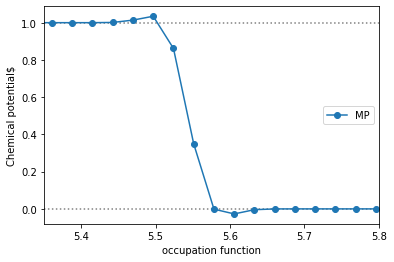

In [6]:
xs, fs, f1s, f2s = Read_Four_Column_File(folder+'occupation_fuction_M-P.dat')
plt.plot(xs, [0]*len(xs), ':', color='gray')
plt.plot(xs, [1]*len(xs), ':', color='gray')

plt.plot(xs, fs, '-o', label='MP')

plt.xlim([5.0, 6.5])
plt.xlim([5.35, 5.8])

plt.xlabel("occupation function")
plt.ylabel(r"Chemical potential$")

plt.legend()

We use bisection + Gaussian smearing to find a point close to the solution

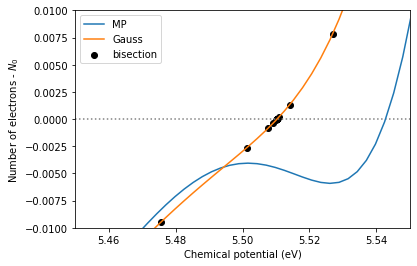

In [4]:
xs, ys = Read_Two_Column_File(folder+'num_electrons.dat')
plt.plot(xs, [0]*len(xs), ':', color='gray')

plt.plot(xs, ys, label='MP')

xs, ys = Read_Two_Column_File(folder+'num_electrons_gauss.dat')
plt.plot(xs, ys, label='Gauss')

xs, ys = Read_Two_Column_File(folder+'minimum_bisection.dat')
plt.scatter(xs, ys, color='black', label='bisection')

plt.ylim([-0.1, 0.1])
plt.xlim([5, 5.75])
plt.ylim([-0.01, 0.01])
plt.xlim([5.45, 5.55])

plt.xlabel("Chemical potential (eV)")
plt.ylabel(r"Number of electrons - $N_0$")

plt.legend()

From that starting point, we search for the minimum of the function (N(mu)-N0)^2:

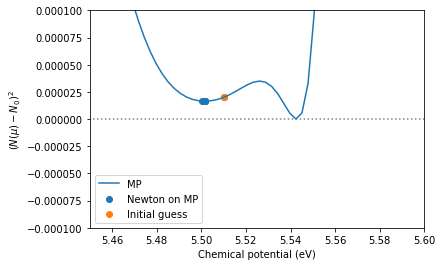

In [5]:
xs, ys = Read_Two_Column_File(folder+'num_electrons.dat')
plt.plot(xs, [0]*len(xs), ':', color='gray')

plt.plot(xs, np.array(ys)**2, label='MP')

xs, ys = Read_Two_Column_File(folder+'minimum_newton_minimization.dat')
plt.scatter(xs, ys, label='Newton on MP')

plt.scatter(xs[0], ys[0], label='Initial guess')

plt.ylim([-0.0001, 0.0001])
plt.xlim([5.45, 5.6])

plt.xlabel("Chemical potential (eV)")
plt.ylabel(r"$(N(\mu) - N_0)^2$")

plt.legend()